In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## Data

In [3]:
data = pd.read_csv('assignment2_train-data.csv')

In [4]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
#컬럼 확인

"""
     Price : The price of the used car in INR Lakhs.

     Name : The brand and model of the car
     Location : The location in which the car is being sold or is available for purchase.
     Year : The year or edition of the model.
     Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
     Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
     Transmission : The type of transmission used by the car. (Automatic / Manual)
     Owner_Type : Whether the ownership is Firsthand, Second hand or other.
     Mileage : The standard mileage offered by the car company in kmpl or km/kg
     Engine : The displacement volume of the engine in CC.
     Power : The maximum power of the engine in bhp.
     Seats : The number of seats in the car.
     New_Price : The price of a new car of the same model.
"""
data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

### 범주형 데이터 중 케이스의 개수가 적은 것들 합쳐주기

In [8]:
data['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [9]:
def change_type(x):
    if x == 'CNG':
        return 'Others'
    elif x== 'LPG':
        return 'Others'
    elif x== 'Electric':
        return 'Others'
    else:
        return x

In [10]:
data['Fuel_Type'] = data['Fuel_Type'].map(change_type)

In [11]:
data['Fuel_Type'].value_counts()

Diesel    3205
Petrol    2746
Others      68
Name: Fuel_Type, dtype: int64

In [12]:
data['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [13]:
def change_type2(x):
    if x == "Fourth & Above":
        return 'Third'
    else:
        return x

In [14]:
data['Owner_Type'] = data['Owner_Type'].map(change_type2)

In [15]:
data['Owner_Type'].value_counts()

First     4929
Second     968
Third      122
Name: Owner_Type, dtype: int64

### index를 나타내는 'Unnamed: 0'열 삭제

In [16]:
data = data.drop(['Unnamed: 0'], axis =1) 
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [17]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Others,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


  
### 'New_Price'열의 경우 null 값이 너무 많이 존재하므로 삭제

In [24]:
data = data.drop(['New_Price'], axis= 1)

### Target distribution

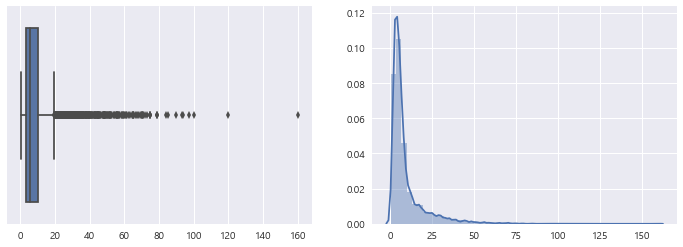

In [19]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data[["Price"]], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)

skewed 되 있으므로 log transformation

In [20]:
data['Price'] = data['Price'].transform(np.log)

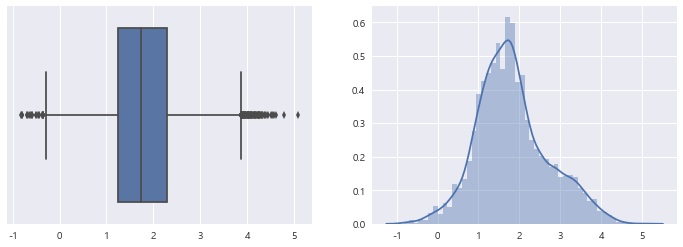

In [21]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data[["Price"]], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)

분포가 어느정도 정규분포를 따르게 되었고, boxplot에서 확인할 수 있는 이상치들 제거

In [22]:
data = data[data['Price'].between(data['Price'].quantile(.03),data['Price'].quantile(.97))]

### 나머지 컬럼들 결측치 확인 후 제거 및 변경

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5657 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5657 non-null object
Location             5657 non-null object
Year                 5657 non-null int64
Kilometers_Driven    5657 non-null int64
Fuel_Type            5657 non-null object
Transmission         5657 non-null object
Owner_Type           5657 non-null object
Mileage              5655 non-null object
Engine               5624 non-null object
Power                5624 non-null object
Seats                5618 non-null float64
Price                5657 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 574.5+ KB


In [26]:
# power, mileage는 object type으로 되있어서 숫자형 부분의 값만 nan값을 갖는 경우 있어서
#그 값들을 nan값으로 만든 후 결측치 제거 실행
data['Power'] = data['Power'].replace('null bhp', np.nan)
data['Mileage'] = data['Mileage'].replace('0.0 kmpl', np.nan)

In [27]:
#같은 모델인 경우 같은 제원을 갖고 있으므로 결측치를 대체하고, 아닌 경우 결측치 행을 제거
for col in ['Mileage','Engine', 'Power','Seats']:
    drop_idx = []
    change_dict = {}
    for key, value in data[data[col].isnull()]['Name'].items():
        if len(data[(data.Name == value)]) == 1:
            drop_idx.append(key)
        else:
            new_value = data[(data['Name'] == value)][col].drop([key],axis = 0).dropna(axis = 0)
            if len(new_value) != 0:
                change_dict[key] = new_value.iloc[0]
            else:
                drop_idx.append(key)

    data = data.drop(drop_idx, axis = 0)
    for key, value in change_dict.items():
        data.loc[key, col] = value

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5555 non-null object
Location             5555 non-null object
Year                 5555 non-null int64
Kilometers_Driven    5555 non-null int64
Fuel_Type            5555 non-null object
Transmission         5555 non-null object
Owner_Type           5555 non-null object
Mileage              5555 non-null object
Engine               5555 non-null object
Power                5555 non-null object
Seats                5555 non-null float64
Price                5555 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 724.2+ KB


### Data type 변환 (object -> float)

In [29]:
import string
deter = string.digits+'.'

def change_digit(x):
    result = ""
    for i in x:
        if i in deter:
            result += i
    return float(result)

In [30]:
for col in ['Mileage', 'Engine', 'Power']:
    data[col] = data[col].map(change_digit)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5555 non-null object
Location             5555 non-null object
Year                 5555 non-null int64
Kilometers_Driven    5555 non-null int64
Fuel_Type            5555 non-null object
Transmission         5555 non-null object
Owner_Type           5555 non-null object
Mileage              5555 non-null float64
Engine               5555 non-null float64
Power                5555 non-null float64
Seats                5555 non-null float64
Price                5555 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 724.2+ KB


### Scaling

In [32]:
y = data.Price
data = data.drop('Price', axis = 1)

In [33]:
continous_col = []
for col in data.columns:
    if data[col].dtype != 'O':
        continous_col.append(col)
print(continous_col)

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']


In [34]:
data.reset_index(drop=True,inplace= True)
y.reset_index(drop=True, inplace= True)

In [35]:
data_continous = data[continous_col]

In [36]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fitted = std_scaler.fit(data_continous)
out = std_scaler.transform(data_continous)

In [37]:
out = pd.DataFrame(out, columns= continous_col, index = list(data.index.values))
data[continous_col] = out
data['Price'] = y

### 이상치 확인 및 제거(quantile)

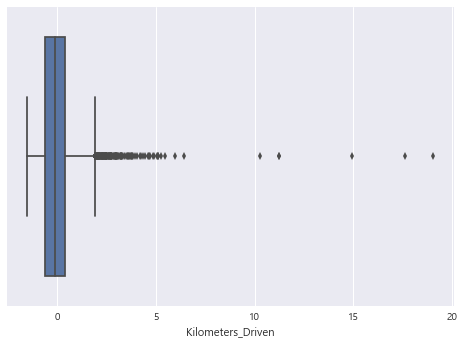

In [38]:
sns.boxplot(data['Kilometers_Driven'])
plt.show()

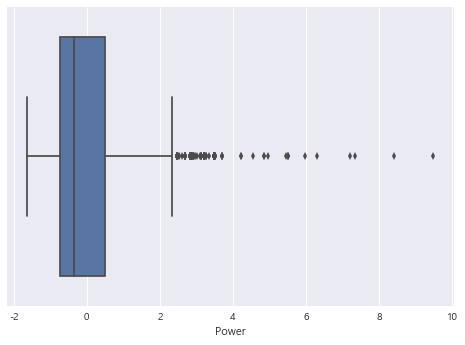

In [39]:
sns.boxplot(data['Power'])
plt.show()

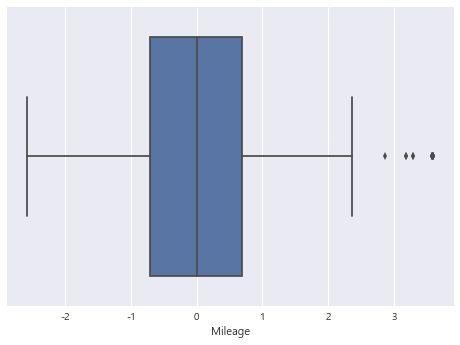

In [40]:
sns.boxplot(data['Mileage'])
plt.show()

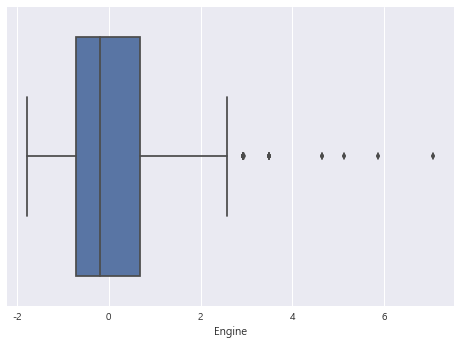

In [41]:
sns.boxplot(data['Engine'])
plt.show()

In [42]:
for col in ['Kilometers_Driven', 'Mileage','Engine','Power']:
    data = data[data[col].between(data[col].quantile(.05),data[col].quantile(.95))]

In [43]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000
mean,0.031209,-0.097840,0.039174,-0.168711,-0.140043,-0.076794,1.755849
std,0.903430,0.604963,0.785464,0.664975,0.669300,0.889282,0.641644
min,-3.931267,-1.165354,-1.592293,-1.088775,-0.916643,-1.638998,0.336472
25%,-0.537293,-0.566349,-0.495655,-0.723121,-0.637736,-0.375694,1.321756
50%,0.141502,-0.141598,0.015470,-0.242288,-0.425973,-0.375694,1.704748
75%,0.820297,0.309699,0.536193,0.008185,0.251064,-0.375694,2.098018
max,1.838489,1.637045,1.743214,1.646311,1.600405,5.940828,3.676301


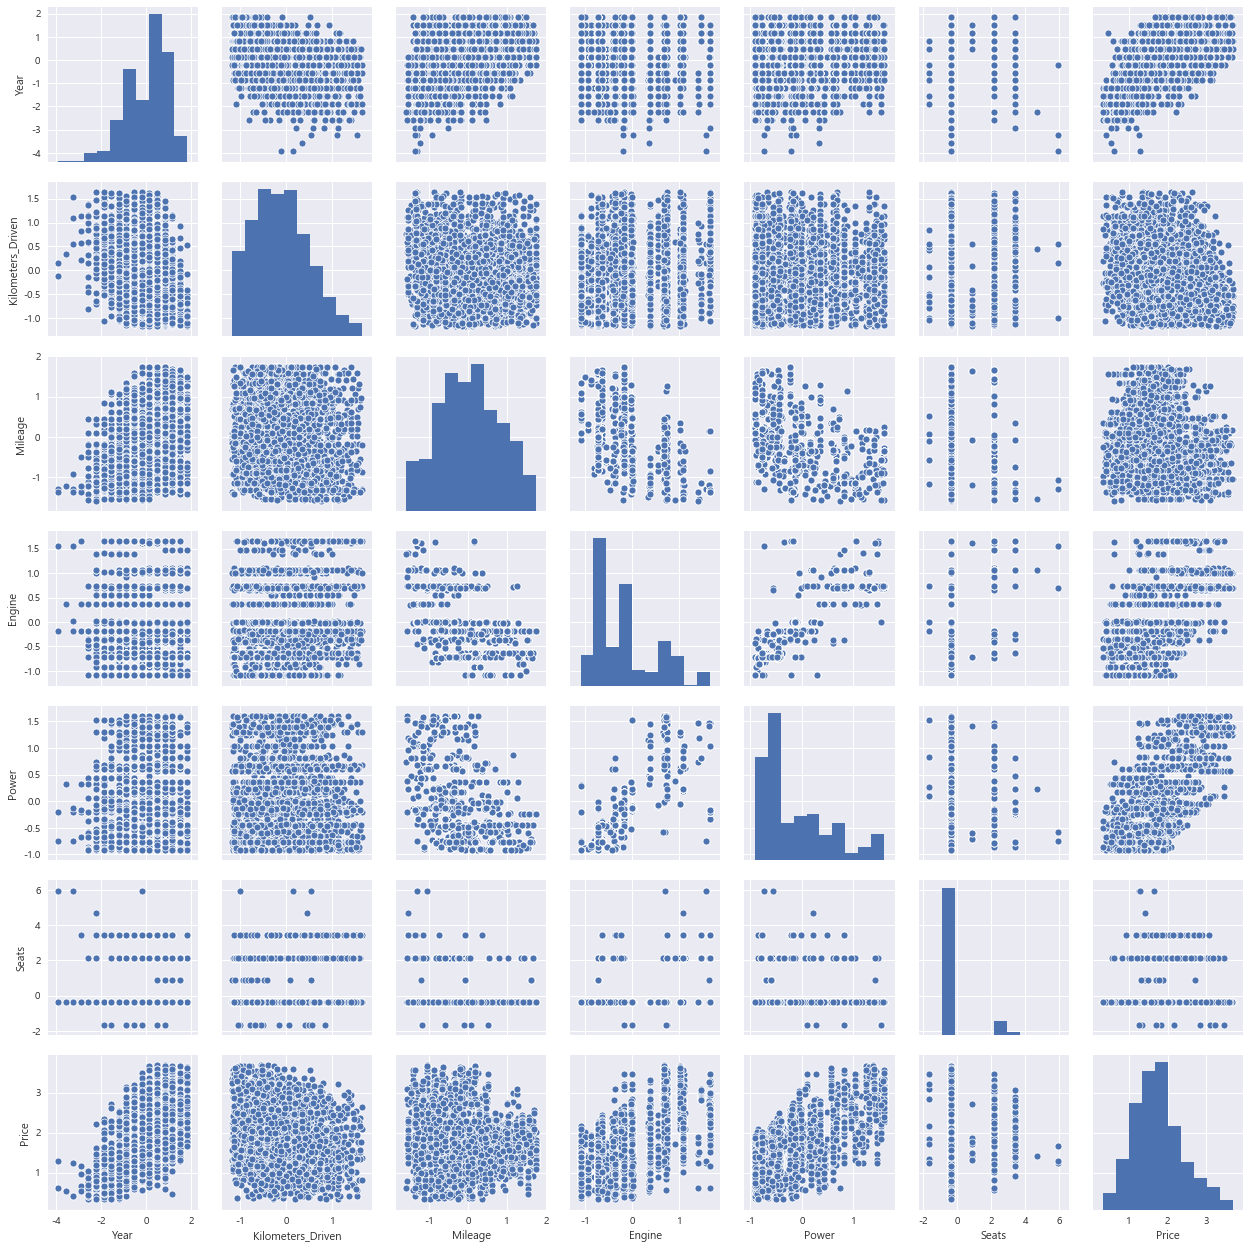

In [684]:
sns.pairplot(data)

대부분 선형성 만족

## 범주형 데이터 처리

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3825 entries, 1 to 5553
Data columns (total 12 columns):
Name                 3825 non-null object
Location             3825 non-null object
Year                 3825 non-null float64
Kilometers_Driven    3825 non-null float64
Fuel_Type            3825 non-null object
Transmission         3825 non-null object
Owner_Type           3825 non-null object
Mileage              3825 non-null float64
Engine               3825 non-null float64
Power                3825 non-null float64
Seats                3825 non-null float64
Price                3825 non-null float64
dtypes: float64(7), object(5)
memory usage: 388.5+ KB


In [45]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'Others'], dtype=object)

In [46]:
dummy_fuel = pd.get_dummies(data.Fuel_Type, drop_first=True)
dummy_fuel.columns = ['fuel0','fuel1']
dummy_fuel.head()

,fuel0,fuel1
1,0,0
2,0,1
3,0,0
4,0,0
8,0,0


In [47]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [48]:
dummy_trans = pd.get_dummies(data.Transmission, drop_first=True)
dummy_trans.columns = ['trans0']
dummy_trans.head()

,trans0
1,1
2,1
3,1
4,0
8,1


In [49]:
data['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [50]:
dummy_owner = pd.get_dummies(data.Owner_Type, drop_first=True)
dummy_owner.columns = ['owner0','owner1']
dummy_owner.head()

,owner0,owner1
1,0,0
2,0,0
3,0,0
4,1,0
8,0,0


In [51]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [52]:
data = pd.concat([data,dummy_fuel,dummy_owner, dummy_trans], axis = 1)
data = data.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'], axis =1)
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,fuel0,fuel1,owner0,owner1,trans0
1,0.480900,-0.433615,0.272232,-0.021067,0.356515,-0.375694,2.525729,0,0,0,0,1
2,-0.876690,-0.300880,-0.080516,-0.721293,-0.450507,-0.375694,1.504077,0,1,0,0,1
3,-0.537293,0.787544,0.536193,-0.631708,-0.449215,2.150915,1.791759,0,0,0,0,1
4,-0.197895,-0.442375,-0.800410,0.684643,0.670716,-0.375694,2.875822,0,0,1,0,0
8,-0.197895,0.188380,0.481001,0.008185,-0.129850,-0.375694,1.648659,0,0,0,0,1


## 변수들 간의 상관관계

In [53]:
X = data.drop(['Price'], axis = 1)
y = data.Price

In [54]:
X.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel0,fuel1,owner0,owner1,trans0
Year,1.000000,-0.470165,0.249620,-0.051497,0.016739,0.058071,0.031786,-0.095887,-0.276499,-0.169594,-0.062159
Kilometers_Driven,-0.470165,1.000000,-0.055618,0.198129,0.051081,0.123925,-0.015796,-0.278536,0.170130,0.091566,0.100296
Mileage,0.249620,-0.055618,1.000000,-0.555028,-0.484196,-0.306465,-0.005463,-0.284324,-0.108776,-0.076576,0.257144
Engine,-0.051497,0.198129,-0.555028,1.000000,0.798388,0.459277,-0.027214,-0.438124,0.046215,0.026310,-0.350902
Power,0.016739,0.051081,-0.484196,0.798388,1.000000,0.119940,-0.041418,-0.258205,0.035254,0.010589,-0.547572
Seats,0.058071,0.123925,-0.306465,0.459277,0.119940,1.000000,0.022212,-0.265714,-0.027613,0.006434,0.149900
fuel0,0.031786,-0.015796,-0.005463,-0.027214,-0.041418,0.022212,1.000000,-0.065074,0.016862,-0.007124,0.035822
fuel1,-0.095887,-0.278536,-0.284324,-0.438124,-0.258205,-0.265714,-0.065074,1.000000,0.023514,0.025142,0.037336
owner0,-0.276499,0.170130,-0.108776,0.046215,0.035254,-0.027613,0.016862,0.023514,1.000000,-0.044113,-0.009229
owner1,-0.169594,0.091566,-0.076576,0.026310,0.010589,0.006434,-0.007124,0.025142,-0.044113,1.000000,-0.002379


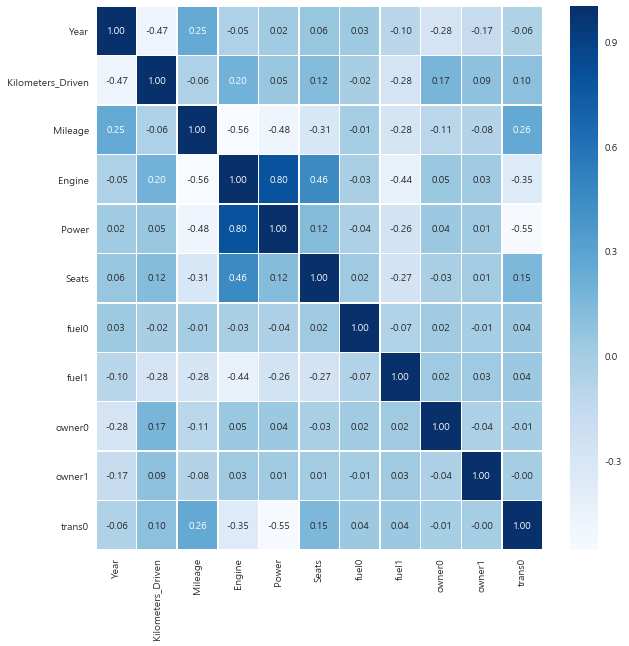

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(data = X.corr(), annot = True, fmt = '.2f', linewidths=.5,cmap = 'Blues')

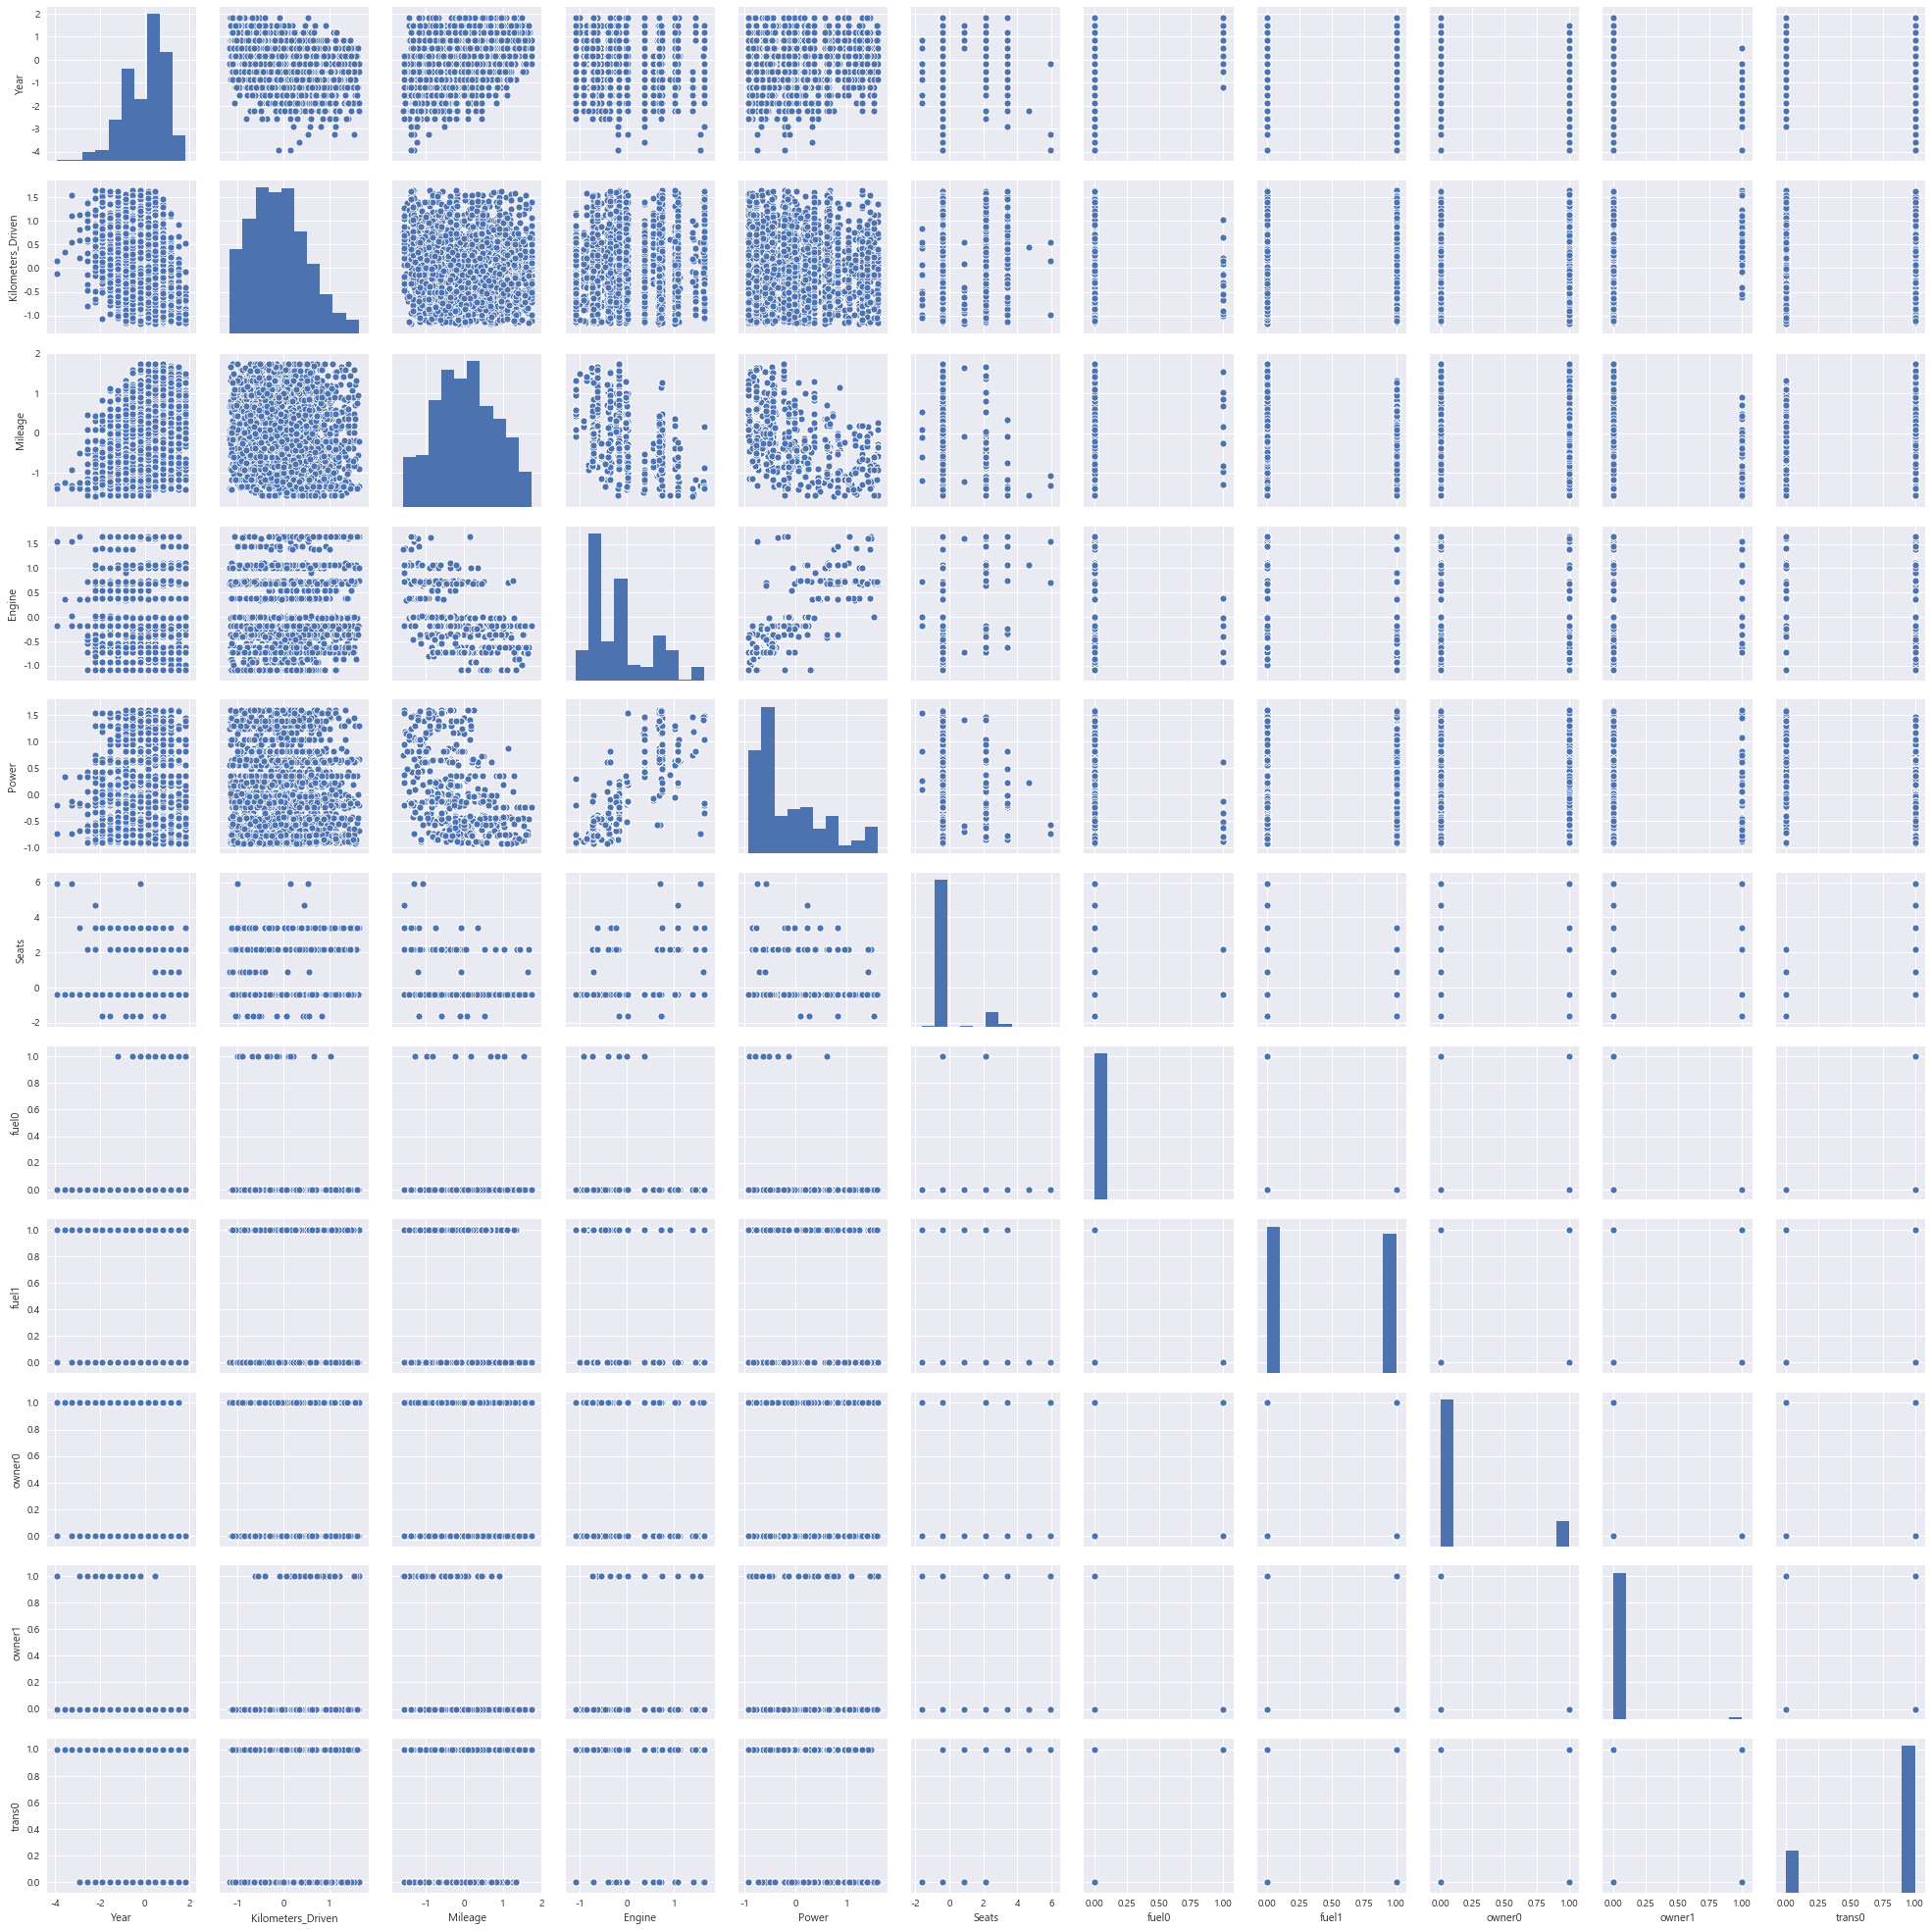

In [56]:
# 변수들 사이의 pairplot 
sns.pairplot(X)

'Engine','Power' 높은 선형 관계를 보인다  
VIF 통해 확인

In [58]:
#VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
3,6.818978,Engine
7,4.266058,fuel1
4,4.157500,Power
2,3.093001,Mileage
10,2.668457,trans0
5,1.818751,Seats
0,1.603272,Year
1,1.561135,Kilometers_Driven
8,1.252708,owner0
9,1.048929,owner1


다중공선성이 의심 가는 변수는 없다.

### target 변수와의 상관관계

In [59]:
data.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Power                0.706078
Engine               0.613753
Year                 0.543102
Seats                0.174656
fuel0               -0.031042
owner1              -0.093346
owner0              -0.145277
Kilometers_Driven   -0.195103
Mileage             -0.199607
fuel1               -0.380706
trans0              -0.505478
Name: Price, dtype: float64

## Modeling

### 1. sklearn LinearRegression

In [60]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [61]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# predict
pred = model.predict(X_train)

In [64]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.840133760611651

In [66]:
mean_squared_error(y_train, pred)

0.06583368137856313

In [67]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[ 0.36177704 -0.04696376 -0.04914215  0.15013988  0.38721283 -0.01083595
 -0.35591391 -0.24072185 -0.03347692 -0.07347188 -0.26026355]
2.1465053574565727


In [68]:
# test data R-square
model.score(X_test, y_test)

0.8208578265123799

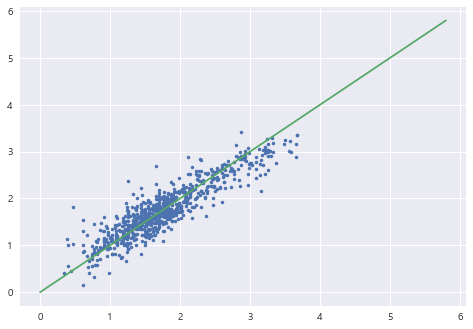

In [69]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
xs = np.linspace(0, np.log(330), 100)
ys = xs
plt.plot(xs, ys)
plt.show()

## Ridge, Lasso Regression

In [70]:
ridge = Ridge(alpha=1.0) # alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge()

In [71]:
# R-square
ridge.score(X_train,y_train)

0.8401273788777213

In [72]:
# Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.050850070055892926

## 2. statsmodel OLS

In [73]:
import statsmodels.api as sm

In [74]:
model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              1534.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                        0.00
Time:                        20:30:41   Log-Likelihood:                         -4586.5
No. Observations:                3825   AIC:                                      9195.
Df Residuals:                    3814   BIC:                                      9264.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

대부분의 p-value < 0.05  
모든 변수들이 통계적으로 유의하다

## 회귀분석 가정 검토

In [75]:
import scipy.stats

In [76]:
# 모델을 통해 얻은 예측값 
pred = result.predict()

In [77]:
# 잔차 = 실제값 - 예측값 
residual = data['Price'] - result.predict()

In [78]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

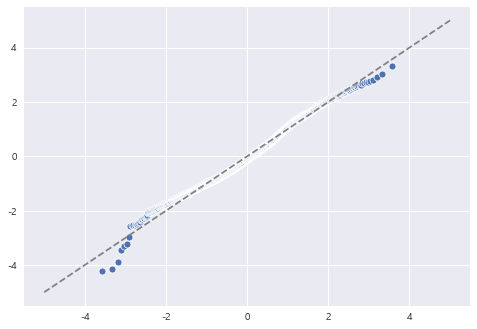

In [79]:
# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-5, 5], [-5, 5], '--', color='grey')

대부분 직선의 형태를 따라가고 있지만 몇몇 잔차가 직선을 따라가지 못해서  
잔차의 정규성을 완벽하게 만족하지 못한다

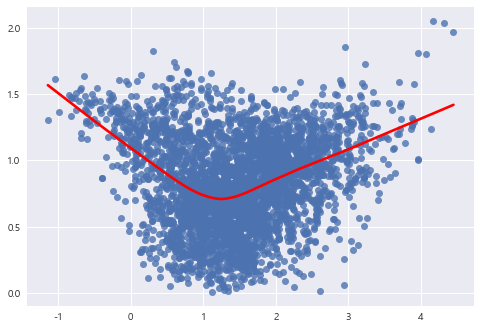

In [80]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

등분산성을 잘 만족하지 못한다